# Практическая работа «Кластеризация. Метод k-средних»

## Цель практической работы

- Научиться строить модель кластеризации на реальных данных.

## Что входит в работу


- Загрузить данные и провести разведочный анализ.
- Предположить оптимальное количество кластеров.
- Построить модель кластеризации с помощью  библиотеки scikit-learn.
- Вычислить оптимальное количество кластеров.
- Интерпретировать результаты.

## Что оценивается

*   Выполнены все этапы задания.
*   Сделаны выводы по результатам.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (с расширением .ipynb) или ссылку на него.


## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [1]:
# Загрузим датасет и посмотрим первые 5 записей

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Создадим дамми переменные для стороковой переменной

df = pd.get_dummies(df, drop_first=True, dtype=np.int64)

In [3]:
# Проверим на пропуски

df.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Genre_Male                0
dtype: int64

In [4]:
# Посмотрим на распределение числовых переменных

df.describe()

# Не замечаем какие либо анамалии

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000


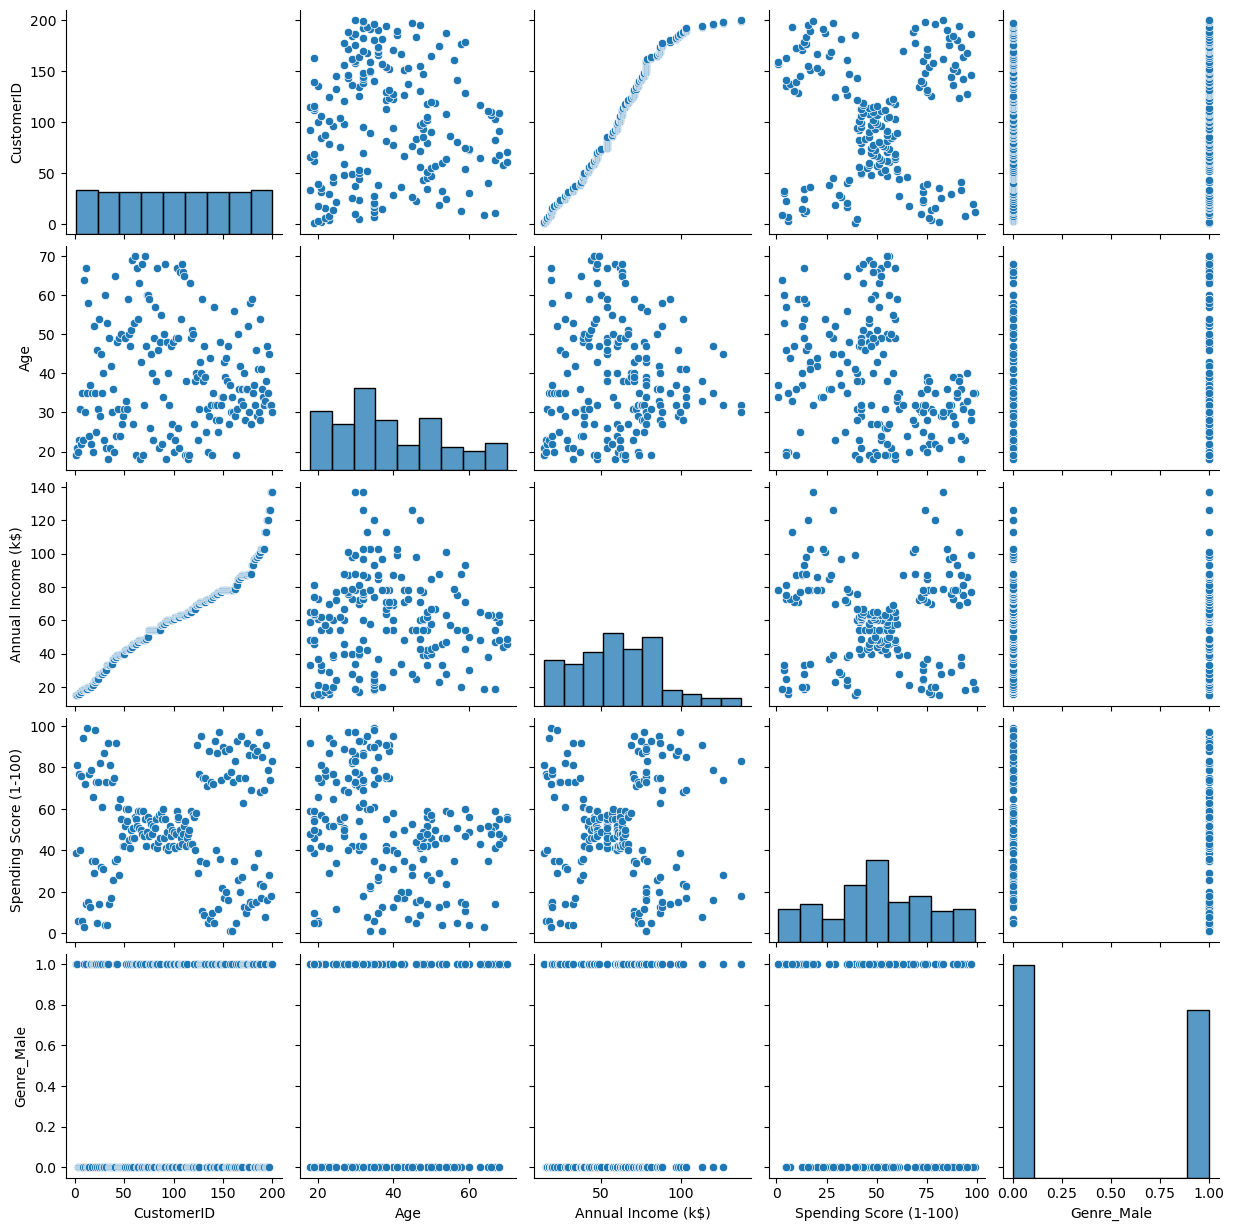

In [5]:
# Посмотрим на распределение переменных по pairplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

Не могу увидеть закономерности или какие то особенности. Что странно так это то что у годового дохода линейная зависимость с айди, что невозможно потому что айди это просто идентификатор покупателя и не может кореллировать с переменными. Так же какое-никакое разделение по группам можно заметить по графику годового дохода и рейтинга трат покупателя. 

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

По графикам могу лишь предположить 2, 3  или 5

### Задание 3

Преобразуйте категориальный признак Genre в численный. Аргументируйте выбор метода кодирования признака.

### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

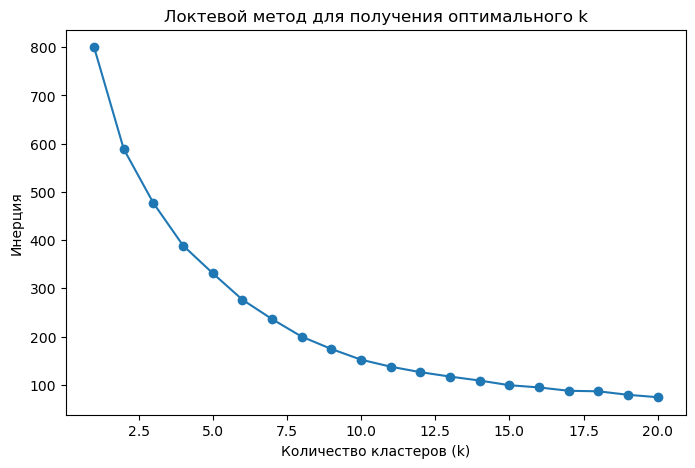

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Удалим айди 
df = df.drop('CustomerID', axis=1)

# Масштабируем признаки
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Построим модели k-средних с различным количеством кластеров
k_values = range(1, 21)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.title('Локтевой метод для получения оптимального k')
plt.show()

Судя по графику оптимальным вариантом является к=10. После этого значения улучшение модели совсем незначительное

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

In [7]:
km = KMeans(n_clusters=10, random_state=42)
km.fit(df)

KMeans(n_clusters=10, random_state=42)

### Задание 6 (выполните по желанию)

При работе с данными важно не только качество моделей машинного обучения, но и интерпретация полученных результатов и представление их в виде, понятном пользователям и заказчикам.

После построения модели кластеризации вы разбили покупателей на группы. Теперь важно интерпретировать эти группы, то есть создать профиль группы. 

В качестве профиля группы часто используют её типичного представителя. В кластерах типичным представителем можно назвать центроиду кластера. В sklearn получить список центроид можно с помощью атрибута `cluster_centers_` у объекта класса KMeans (этот атрибут возвращает матрицу с размерностями (количество кластеров, количество признаков), подробнее об этом [в материале](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)). 

Получите центроиды кластеров, преобразуйте их к датафрейму, опишите типичного представителя каждой группы и чем группы отличаются друг от друга. При описании и сравнении используйте методы визуализации.

In [8]:
# Получим предикт
df['Cluster'] = km.fit_predict(df)
optimal_k = 10

# Получим центроиды
centers = km.cluster_centers_

# Создадим DataFrame с центроидами
centroid_df = pd.DataFrame(centers, columns=df.columns[:-1])  # Исключаем колонку 'Cluster'

# Выводим информацию о центроидах
print("Centroids:")
print(centroid_df)

# Опишите типичного представителя каждой группы
for i in range(optimal_k):
    print(f"\nCluster {i} Profile:")
    print(df[df['Cluster'] == i].mean())

Centroids:
         Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
0  48.750000           24.583333                9.583333    0.416667
1  32.454545          108.181818               82.727273    0.454545
2  46.160000           61.320000               46.360000    0.360000
3  25.272727           25.727273               79.363636    0.409091
4  42.636364          108.181818               21.272727    0.363636
5  24.448276           56.379310               50.724138    0.379310
6  38.230769           30.384615               35.076923    0.384615
7  39.363636           79.136364               13.363636    0.636364
8  32.785714           78.035714               81.892857    0.464286
9  61.444444           51.185185               50.444444    0.481481

Cluster 0 Profile:
Age                       48.750000
Annual Income (k$)        24.583333
Spending Score (1-100)     9.583333
Genre_Male                 0.416667
Cluster                    0.000000
dtype: float64

Cluster 1 Prof

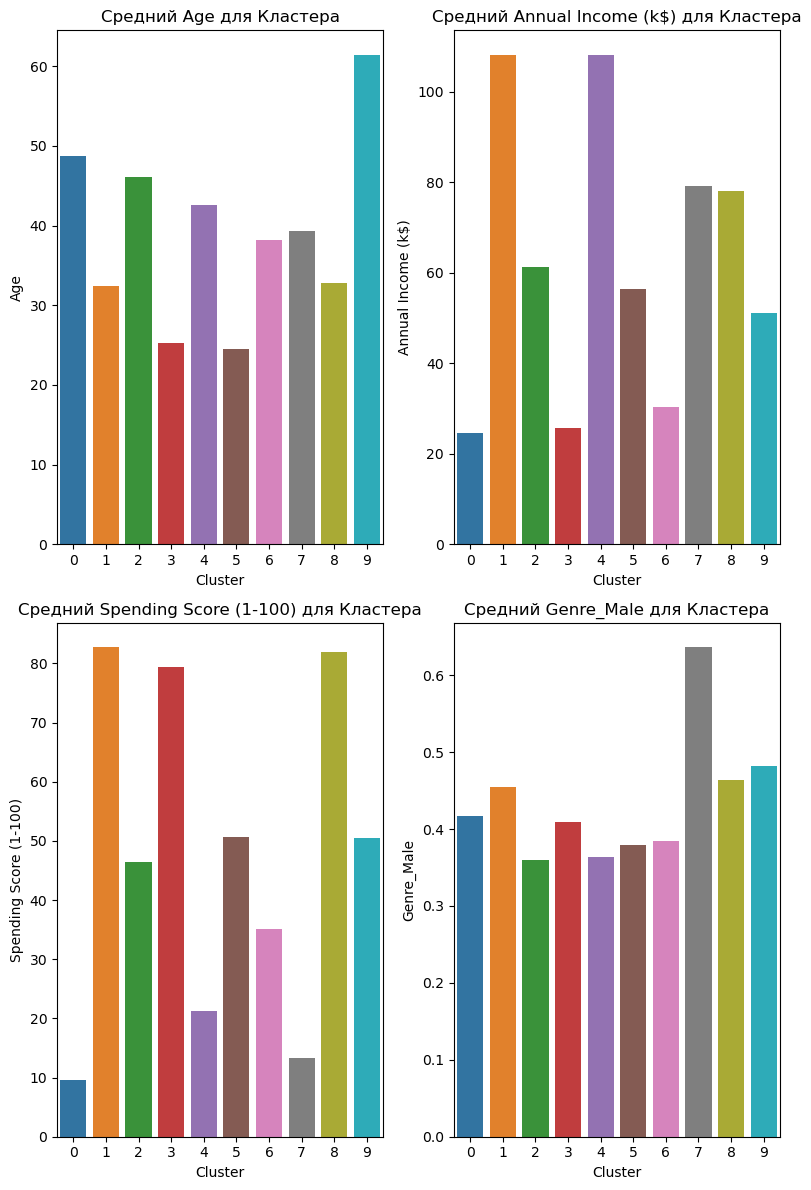

In [28]:
cluster_means = df.groupby('Cluster').mean().reset_index()
plt.figure(figsize=(8, 12))
for i, column in enumerate(df.columns[:-1]):  # исключаем колонку 'Cluster'
    plt.subplot(2, 2, i + 1)
    sns.barplot(x='Cluster', y=column, data=cluster_means)
    plt.title(f'Средний {column} для Кластера')

plt.tight_layout()
plt.show()

И так какие выводы мы можем сделать

Cluster 0 (Index 0): Этот кластер представляет людей среднего возраста, с низким годовым доходом, низким уровнем трат и преимущественно женского пола (Genre_Male значение ниже 0.5).

Cluster 1 (Index 1): Этот кластер представляет людей среднего возраста с высоким годовым доходом и высоким уровнем трат. В этой группе также преобладают представители мужского пола (Genre_Male значение ближе к 0.5).

Cluster 2 (Index 2): Кластер, представляющий людей старшего возраста, средний годовой доход, и уровень трат находится в среднем. Преобладает женский пол.

Cluster 3 (Index 3): Этот кластер включает людей молодого возраста, сравнительно низким годовым доходом и высоким уровнем трат. Преобладает мужской пол.

Cluster 4 (Index 4): Кластер, представляющий людей среднего возраста с высоким годовым доходом, но низким уровнем трат. Преобладает мужской пол.

Cluster 5 (Index 5): Этот кластер включает людей молодого возраста, средний годовой доход и средний уровень трат. Преобладает женский пол.

Cluster 6 (Index 6): Люди среднего возраста, низкий годовой доход и низкий уровень трат. Преобладает женский пол.

Cluster 7 (Index 7): Этот кластер представляет людей среднего возраста среднего годового дохода и низким уровнем трат. Преобладает мужской пол.

Cluster 8 (Index 8): Люди среднего возраста с высоким годовым доходом и высоким уровнем трат. Преобладает мужской пол.

Cluster 9 (Index 9): Люди старшего возраста среднего годового дохода и среднего уровня трат. Преобладает мужской пол.